In [5]:
import sys
sys.path.append('method_features_extraction/')
import features_extractor as fe
import image_processing as ip
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.filters import threshold_otsu, try_all_threshold, threshold_mean
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


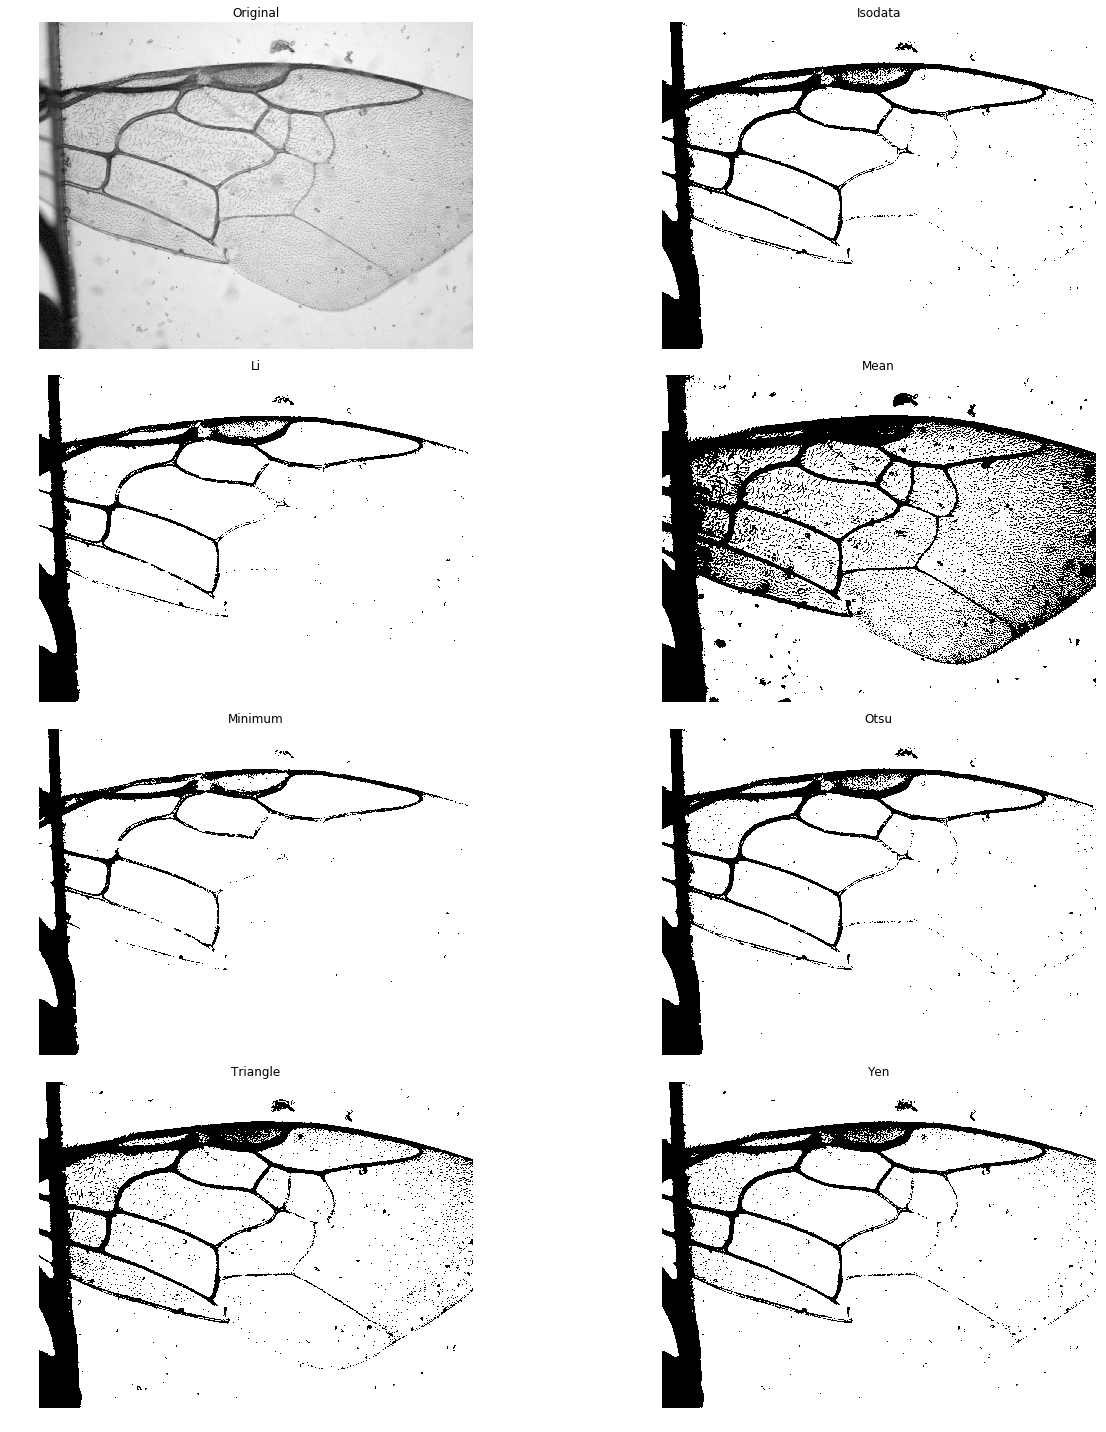

In [6]:
image_rgb = imread('training/raw_images/47 Lasioglossum nymphaerum f right 4x.jpg')
image_gray = rgb2gray(image_rgb)
thresh = threshold_otsu(image_gray)
binaries = try_all_threshold(image_gray, figsize=(20, 20))



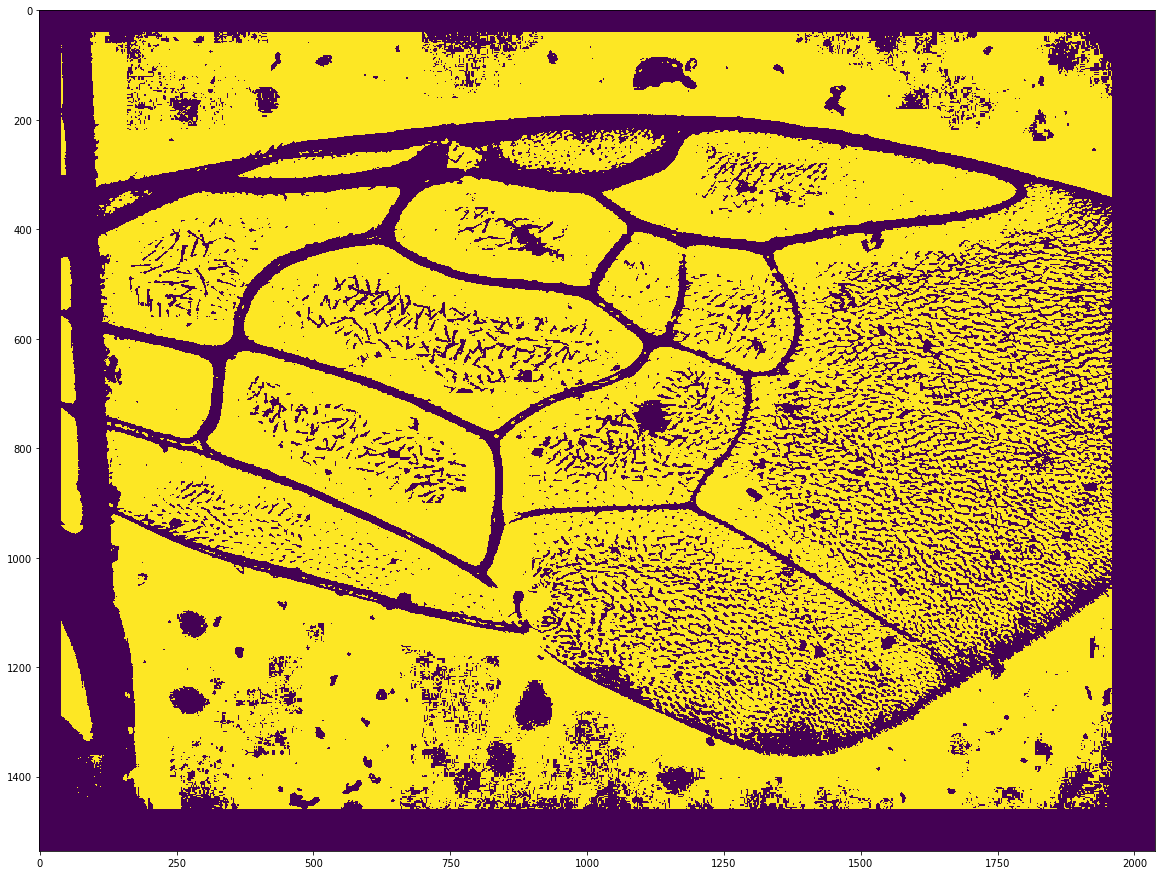

In [7]:
blocks = ip.block_binarization(image_gray)

plt.imshow(blocks)

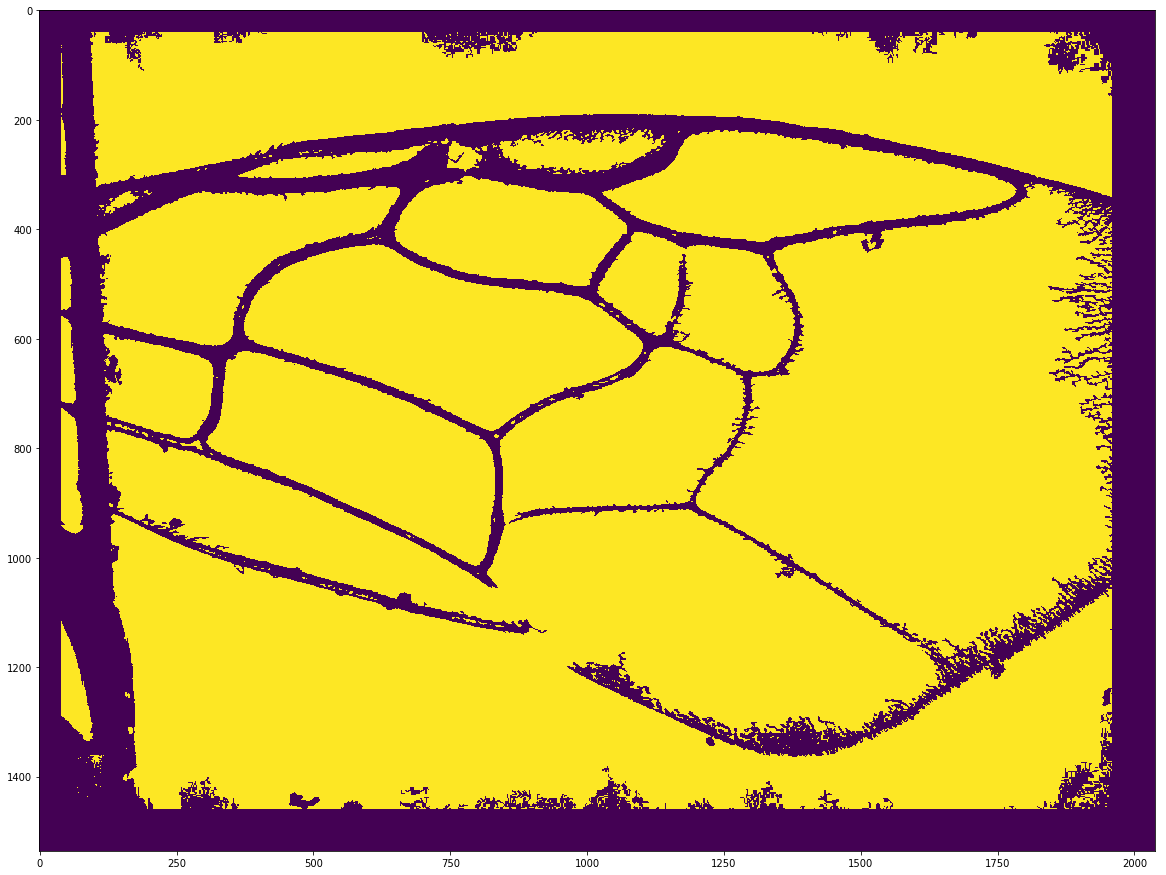

In [8]:
cleared = ip.clear_binary(blocks)
plt.imshow(cleared)

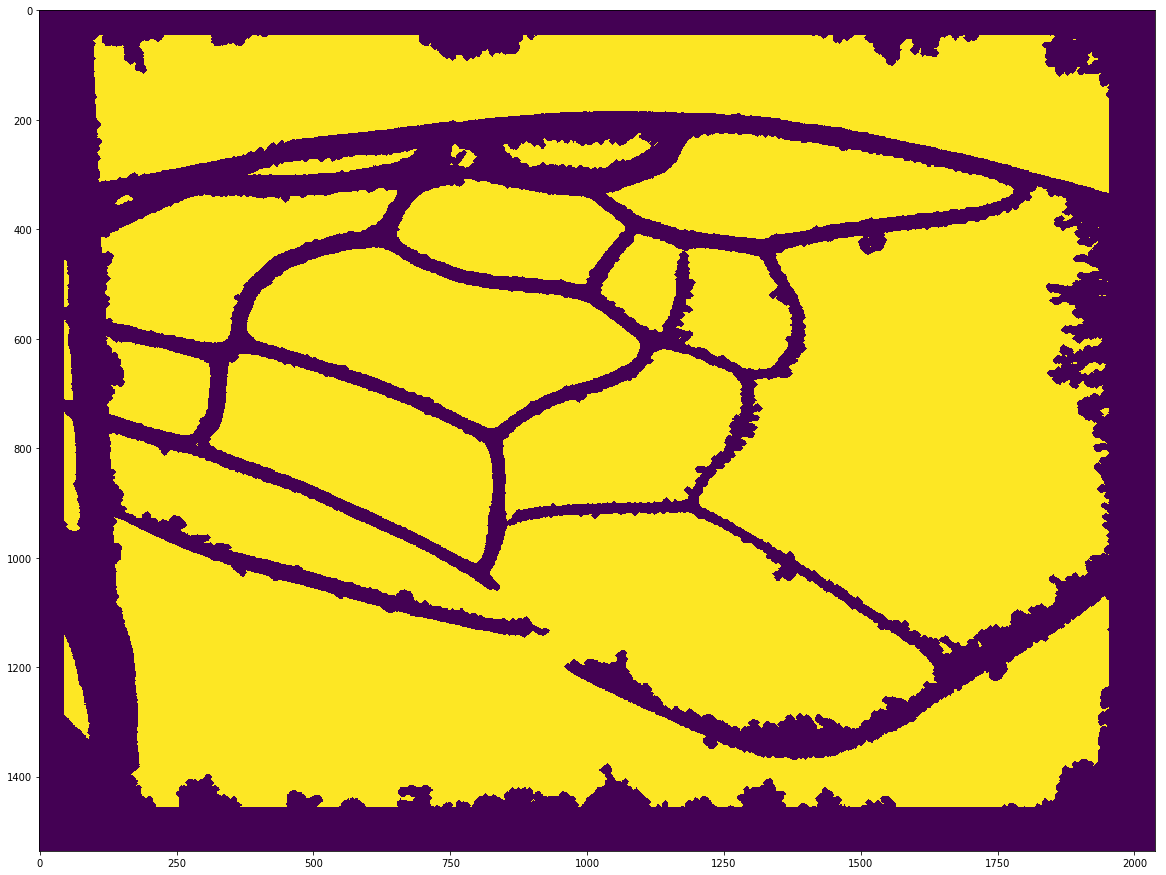

In [9]:
cleared = ndi.binary_erosion(cleared, iterations=5)
plt.imshow(cleared)

/home/theo/anaconda3/lib/python3.6/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


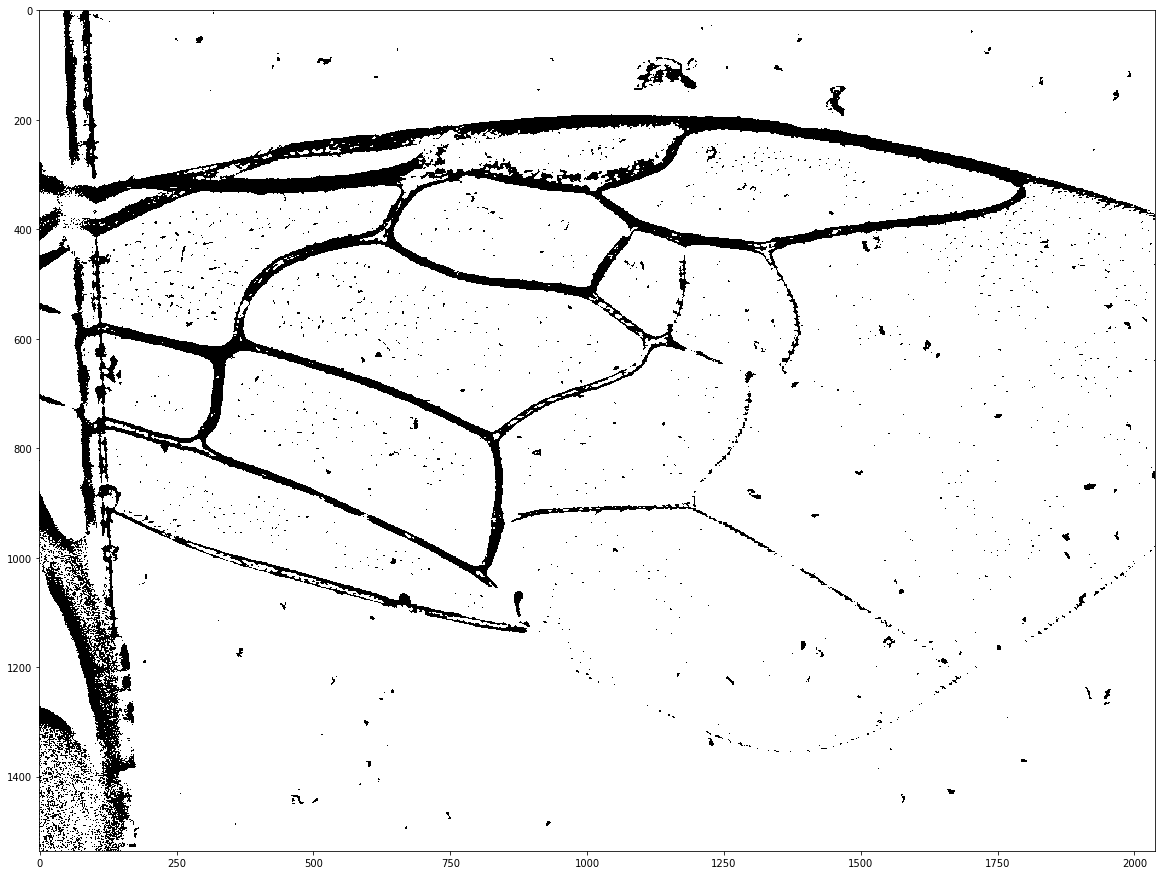

In [10]:
from skimage.filters import threshold_sauvola

sauvola = threshold_sauvola(image_gray, window_size=61)
bin_sauv = image_gray > sauvola
plt.imshow(bin_sauv, plt.cm.gray)

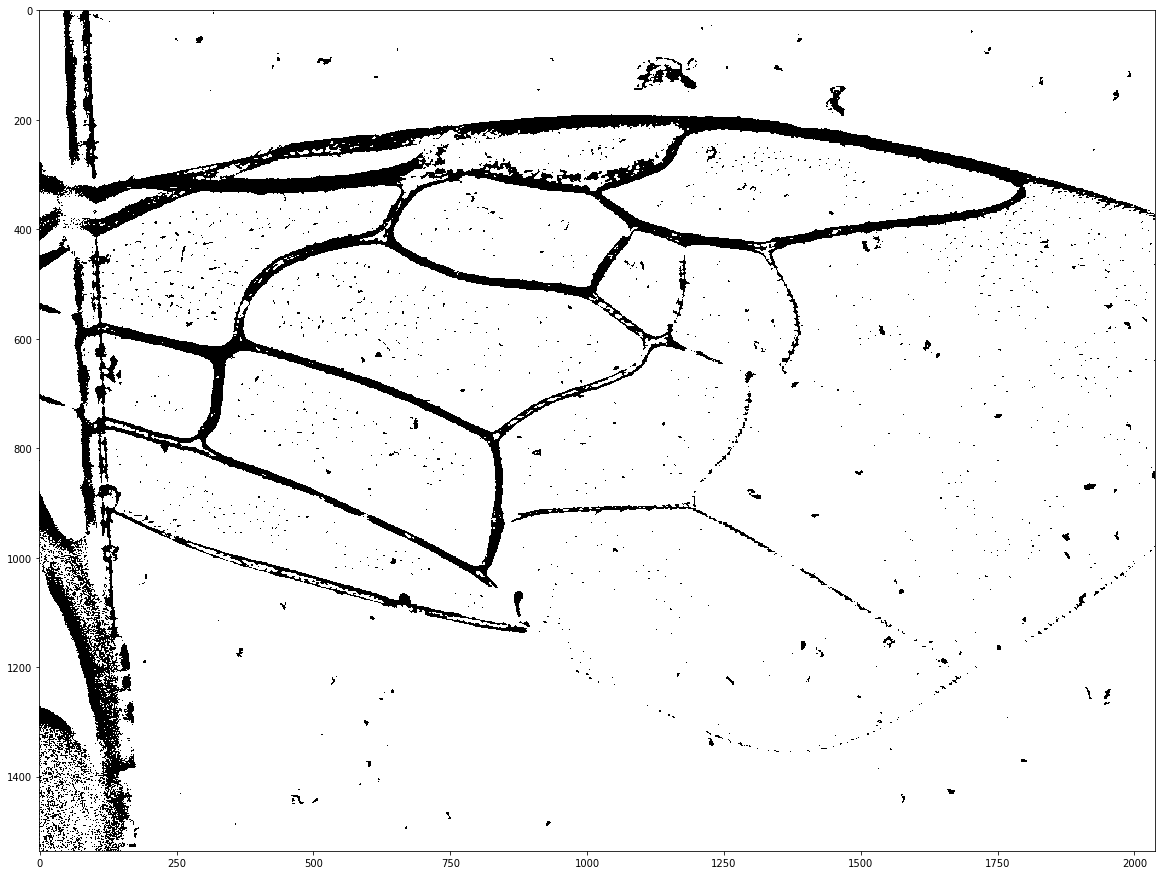

In [11]:
from skimage.filters import threshold_niblack

niblack = threshold_sauvola(image_gray, window_size=61)
bin_nib = image_gray > niblack
plt.imshow(bin_nib, plt.cm.gray)

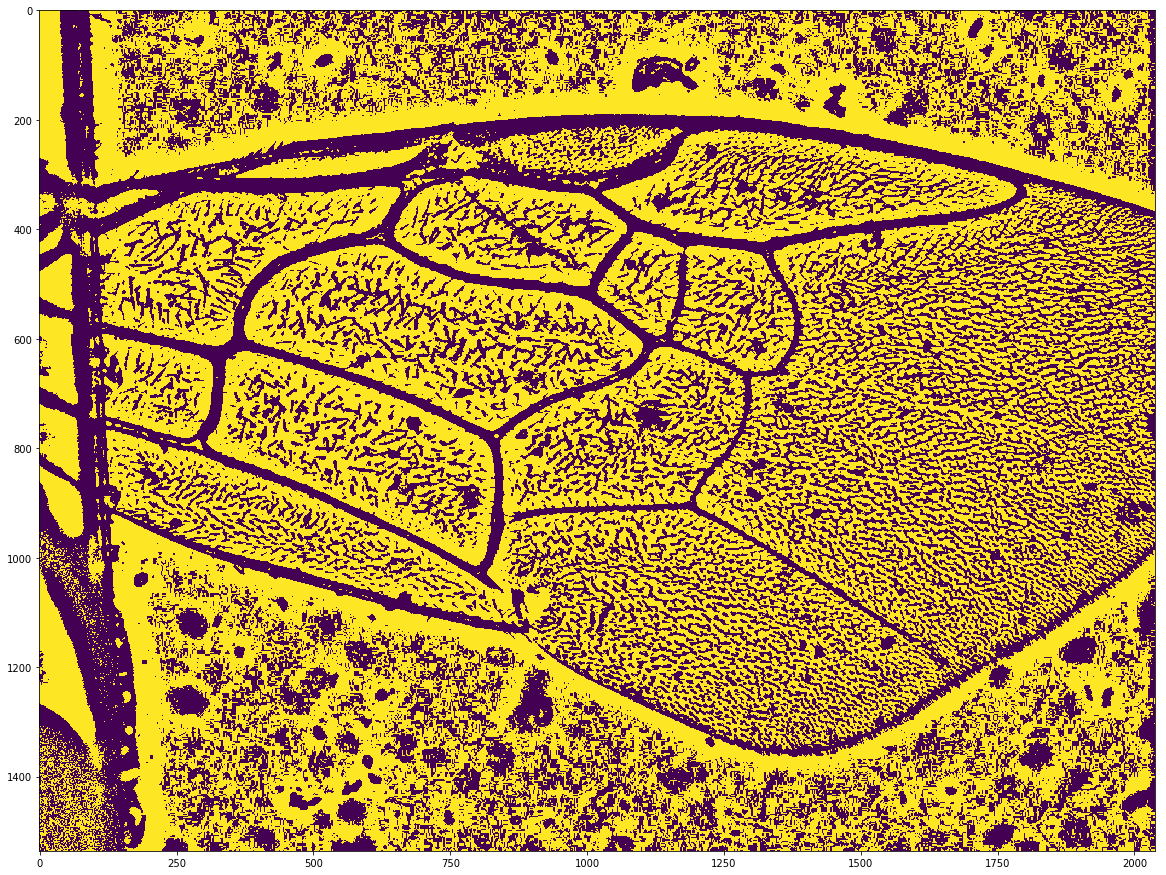

In [12]:
from skimage.filters import threshold_local

thresh = threshold_local(image_gray, block_size=101)
binary = image_gray > thresh
plt.imshow(binary)

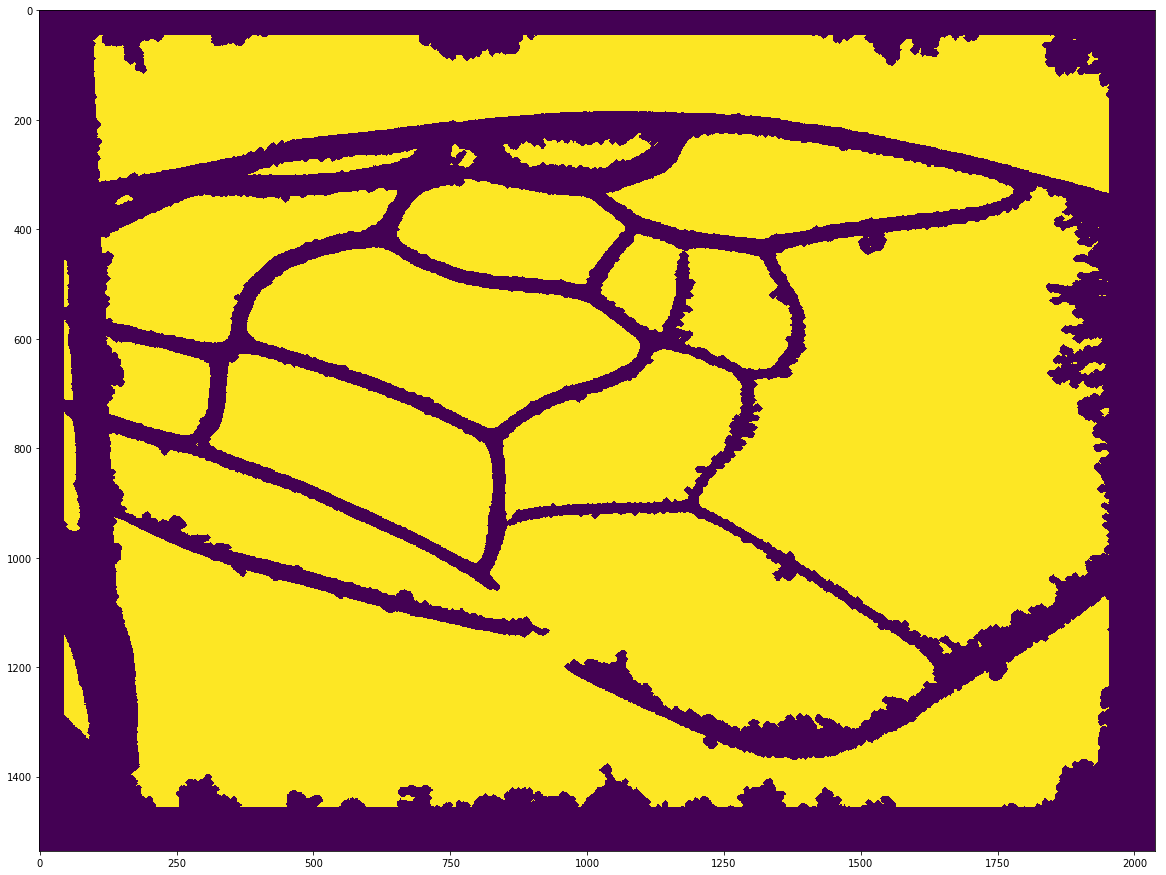

In [13]:
cleared2 = ip.clear_binary(binary)
cleared2 = ndi.binary_erosion(cleared, iterations=5)
plt.imshow(cleared)

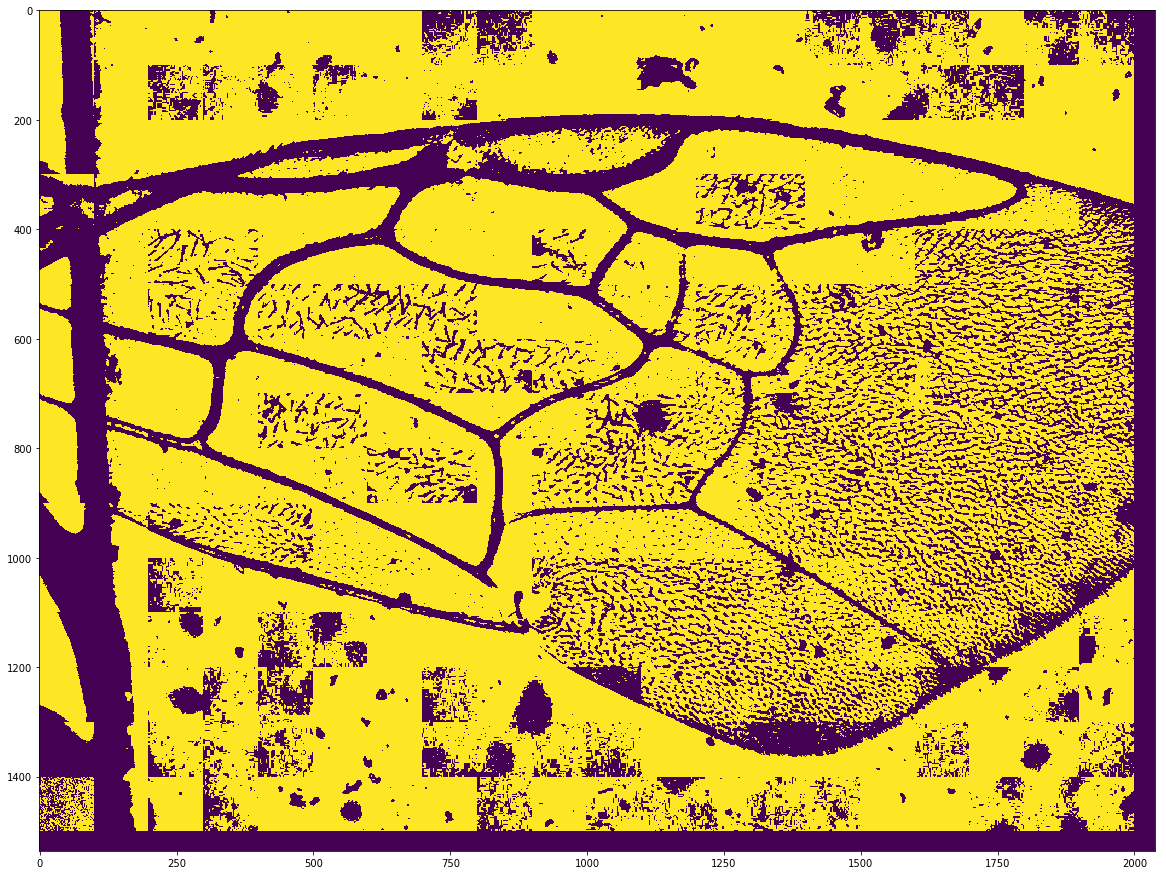

In [14]:
sub = ip.sub_block_binarization(image_gray)
plt.imshow(sub)

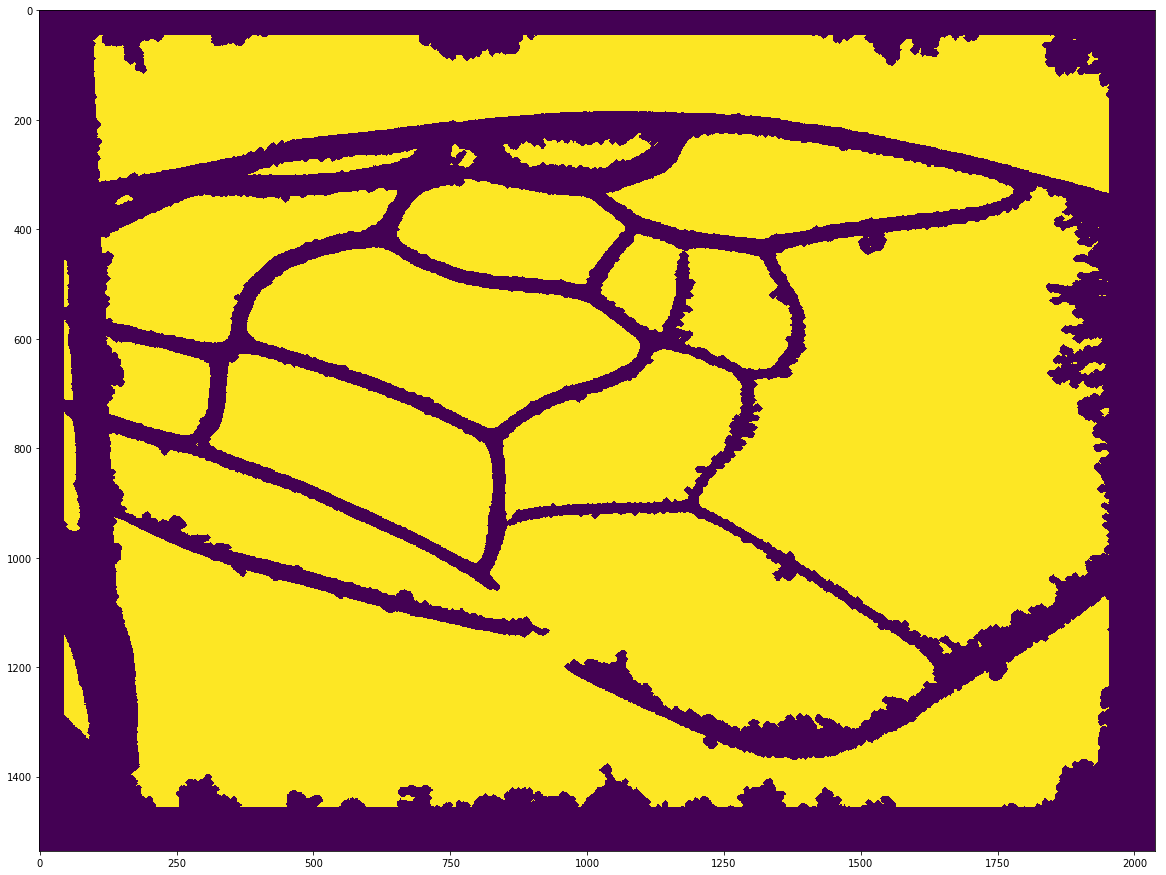

In [15]:
plt.imshow(cleared)

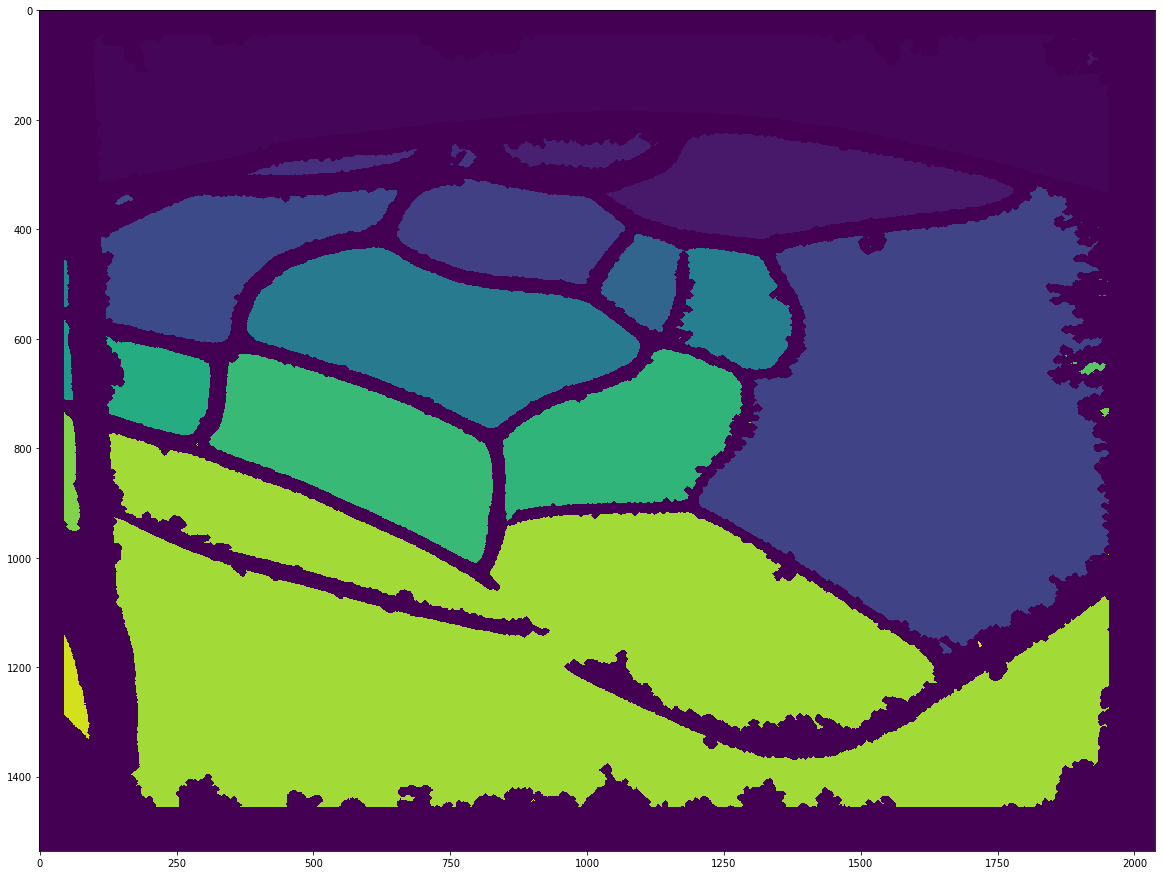

In [16]:
markers, _ = ndi.label(cleared, structure=ndi.generate_binary_structure(2, 2))
plt.imshow(markers)

# Filter and label lasted 0.0807s


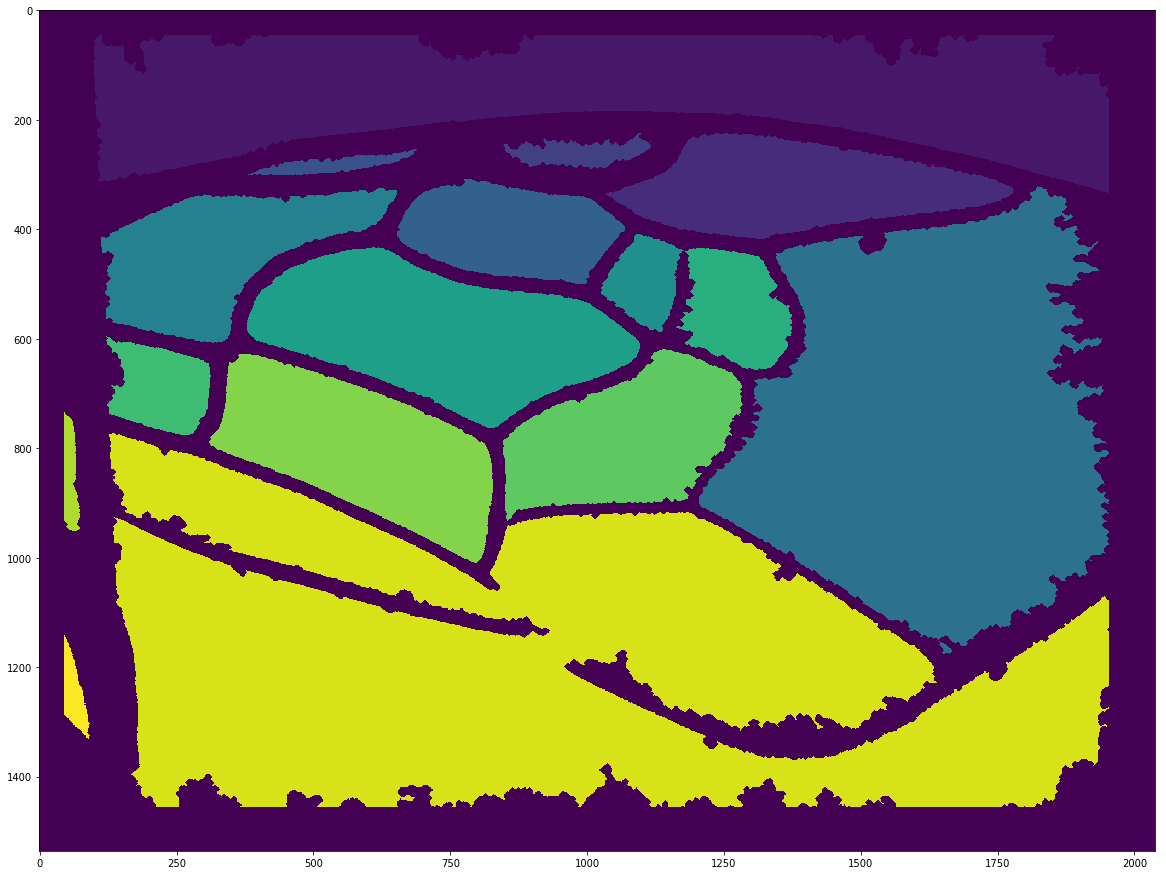

In [17]:
import numpy as np

markers , _= ip.filter_and_label(markers)
markers = np.array(markers)
plt.imshow(markers)

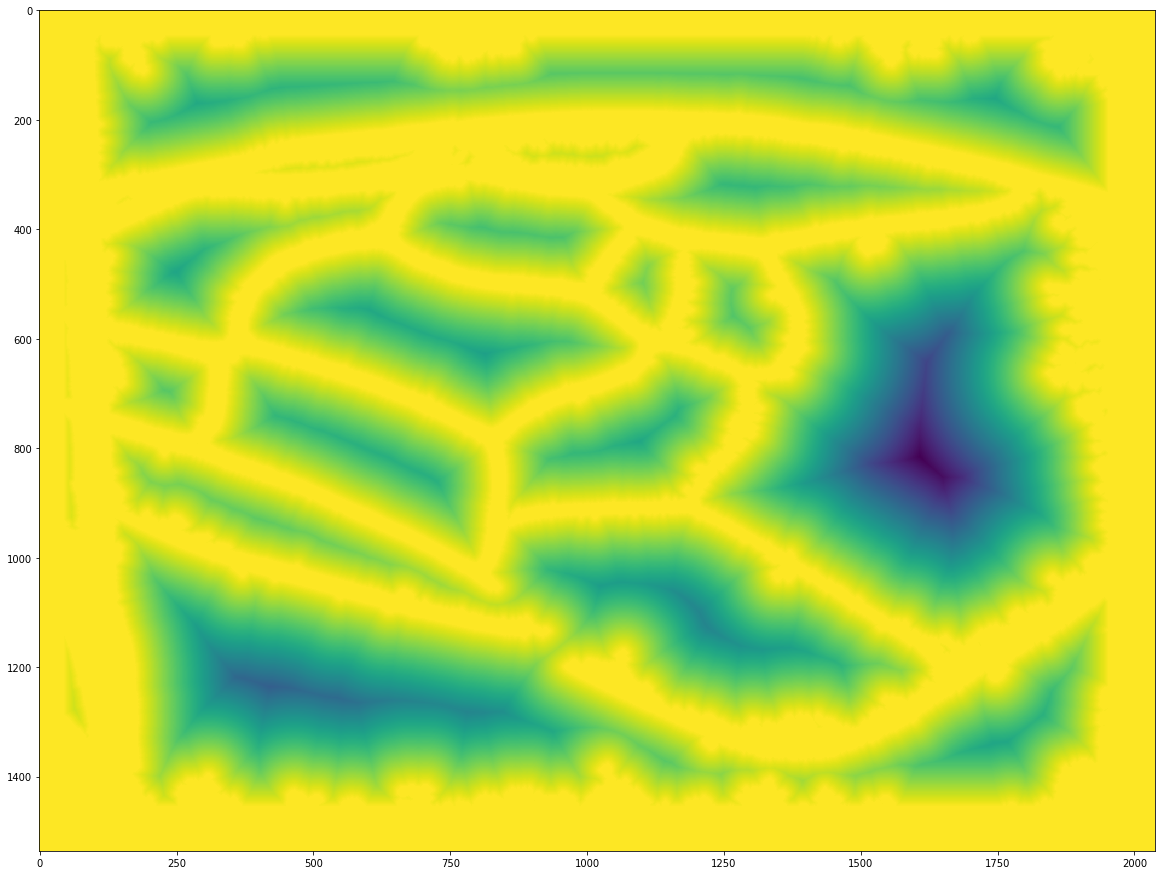

In [18]:
distances = ndi.distance_transform_edt(cleared)
plt.imshow(-distances)

/home/theo/anaconda3/lib/python3.6/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


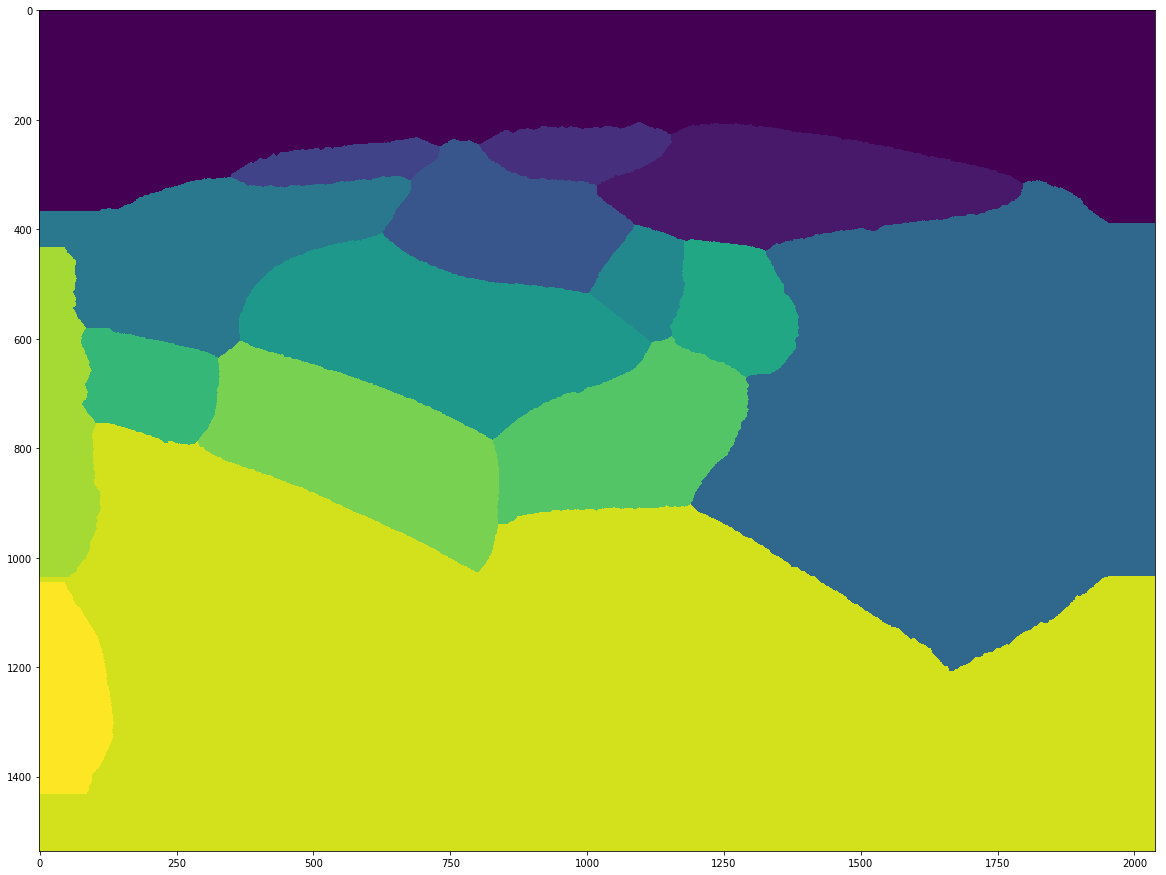

In [19]:
from skimage.morphology import watershed

wat = watershed(-distances, markers)
plt.imshow(wat)

/home/theo/anaconda3/lib/python3.6/site-packages/skimage/segmentation/_clear_border.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True
/home/theo/anaconda3/lib/python3.6/site-packages/skimage/segmentation/_clear_border.py:60: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True


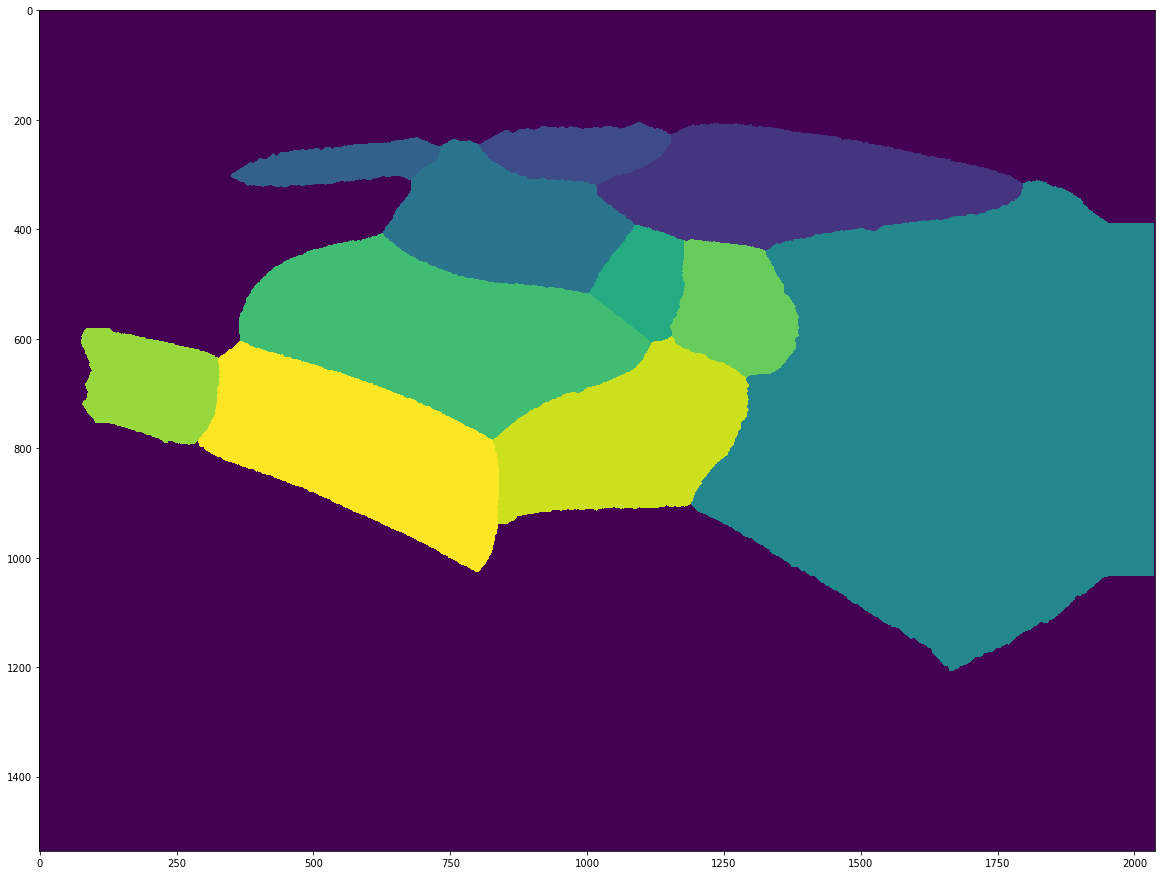

In [20]:
from skimage.segmentation import clear_border

#wat[0,:] = 0
wat[:, -1] = 0
#wat[:, 0] = 0
no_bord = clear_border(wat)
plt.imshow(no_bord)


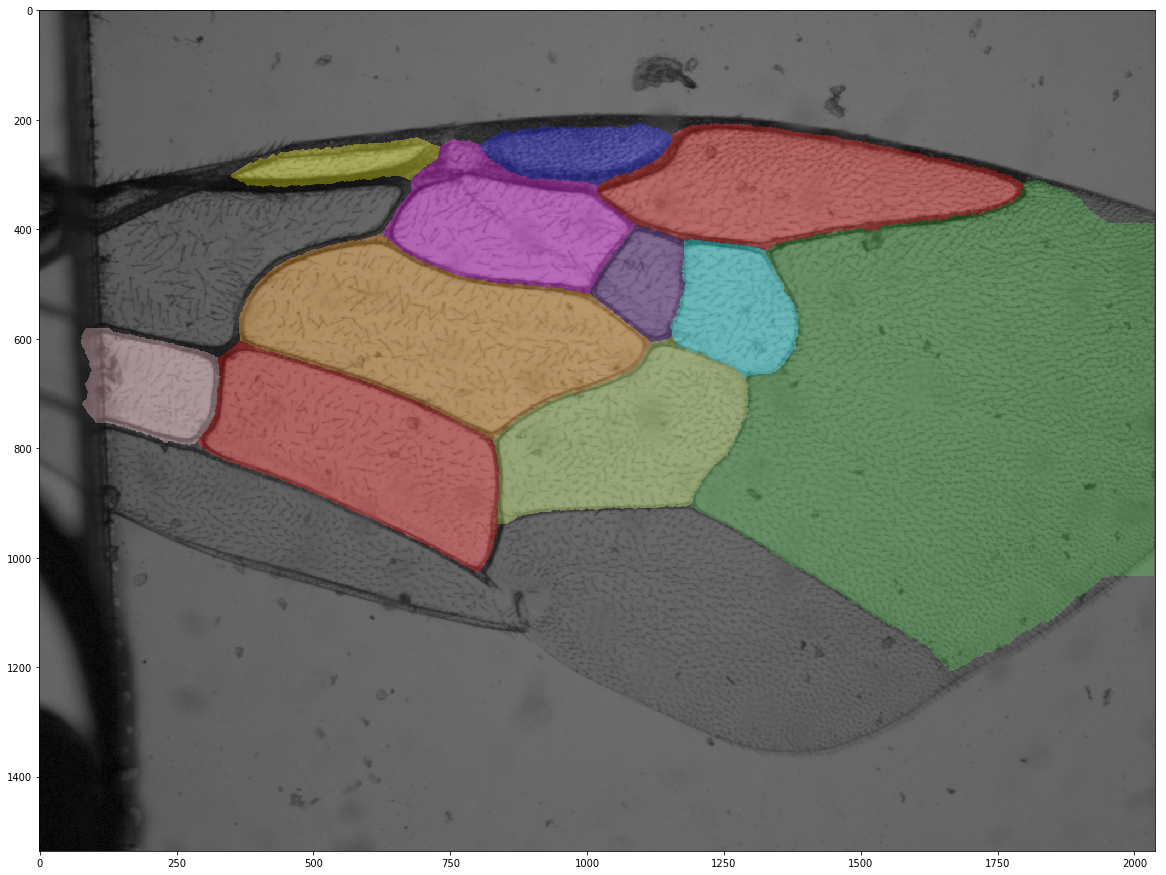

In [47]:
from skimage.color import label2rgb
#colors = ['red','blue','green', 'cyan', 'orange', 'purple', 'brown', 'yellow', 'gray', 'darkgreen', 'lightblue']
overlay = label2rgb(no_bord, image_gray, bg_label=0)
plt.imshow(overlay)

# Update image label lasted 0.0262s
# Plotting lasted 0.6074s


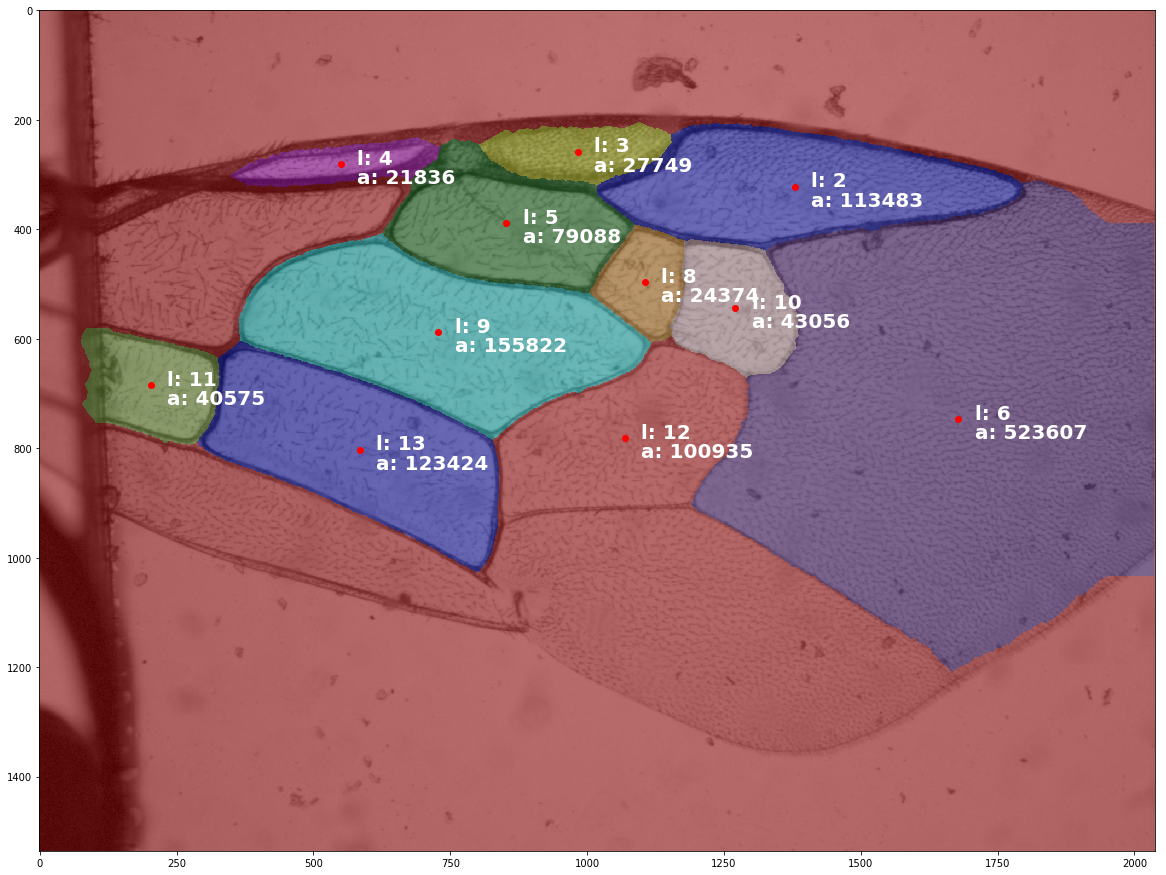

In [21]:
import image_processing as ip

rs = ip.region_sorter(no_bord, 'filename')
fig, ax = plt.subplots()
rs.plot(image_gray, ax, 20)